# Library

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
df = pd.read_csv("../Models/data_tofit.csv")
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


## Test/train

In [3]:
# Split train test

X_train, X_test, y_train, y_test = train_test_split(df.drop("Addiction", axis = 1), df["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df["Addiction"])

# Model 1: 

In [4]:
# define the parameter values that should be searched
# k_range = range(1, 31)
k_range = list(range(1, 31))

In [5]:
#Hyperparameters definition
param = {"n_neighbors": k_range, 
         "weights": ["uniform", "distance"],
         "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
         "p":[1,2,3]}

In [6]:
#GridSearch
k_nn_grid = GridSearchCV(KNeighborsClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
k_nn_grid.fit(X_train, y_train)
k_nn_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [7]:
print("Best parameters {} with best score {} ".format(k_nn_grid.best_params_,\
k_nn_grid.best_score_))

Best parameters {'algorithm': 'auto', 'n_neighbors': 20, 'p': 3, 'weights': 'uniform'} with best score 0.9028571428571428 


In [8]:
results = pd.DataFrame(k_nn_grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002001,6.217196e-07,0.007201,0.000401,auto,1,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1...",0.836735,0.824490,0.853061,0.832653,0.820408,0.833469,0.011370,705
1,0.001800,4.001379e-04,0.003601,0.000490,auto,1,1,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1...",0.836735,0.824490,0.853061,0.832653,0.820408,0.833469,0.011370,705
2,0.001801,7.486596e-04,0.007401,0.002333,auto,1,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2...",0.857143,0.832653,0.840816,0.853061,0.812245,0.839184,0.016038,681
3,0.002201,4.001618e-04,0.003601,0.000490,auto,1,2,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2...",0.857143,0.832653,0.840816,0.853061,0.812245,0.839184,0.016038,681
4,0.002000,6.327113e-04,0.067015,0.005551,auto,1,3,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 3...",0.848980,0.820408,0.844898,0.840816,0.824490,0.835918,0.011370,693


Text(0, 0.5, 'mean')

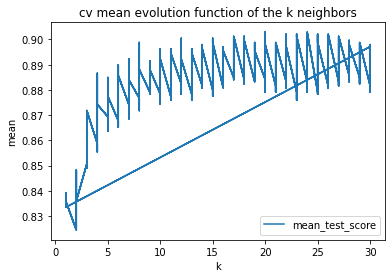

In [9]:
#Looking at mean evolution by k neighbors

results.plot(x = "param_n_neighbors", y = "mean_test_score")
plt.title("cv mean evolution function of the k neighbors")
plt.xlabel("k")
plt.ylabel("mean")

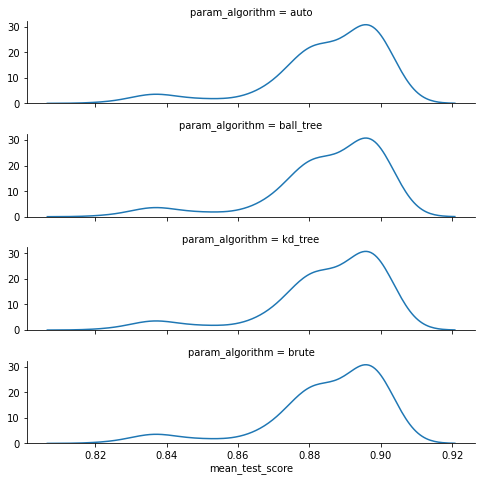

In [10]:
#Looking algorithms score
g = sns.FacetGrid(results, row="param_algorithm",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "mean_test_score")

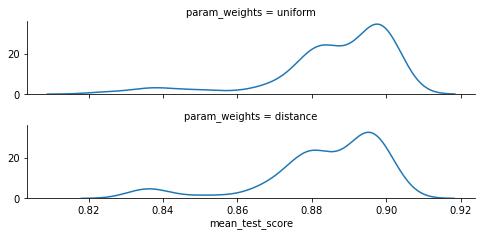

In [11]:
#Looking weights scores
g = sns.FacetGrid(results, row="param_weights",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "mean_test_score")

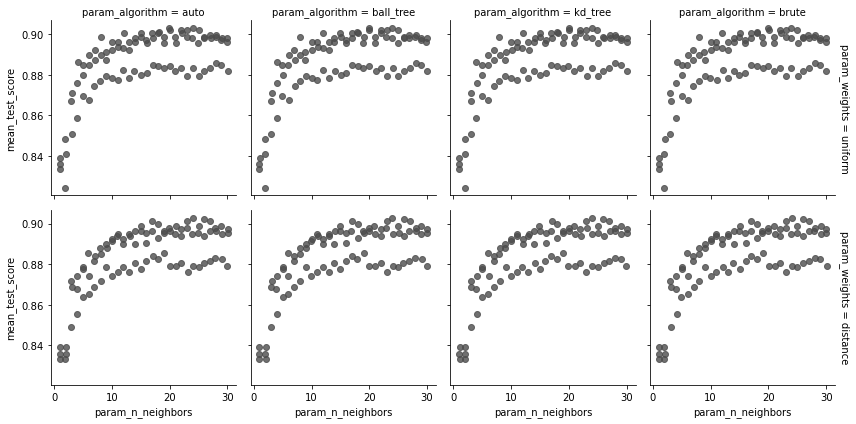

In [12]:
#Comparing parameters
g = sns.FacetGrid(results, row="param_weights", col="param_algorithm", margin_titles=True)
g.map(sns.regplot, "param_n_neighbors","mean_test_score", color=".3", fit_reg=False, x_jitter=.1)

- only k have a really impact on mean_test_score 
- the other parameters have a similar behavior on the algorithm
- k is converging to a score limit after more or less k = 20
- No efficient algorithm improvment 

## Test set

In [13]:
# Testing model
y_pred = k_nn_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8984848484848484

We get 90 % model on both train and test set, no tendance to overfitting

In [14]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,149,8,26,183
Addiction without psychologic effect,9,153,17,179
No Addiction,3,4,291,298
All,161,165,334,660


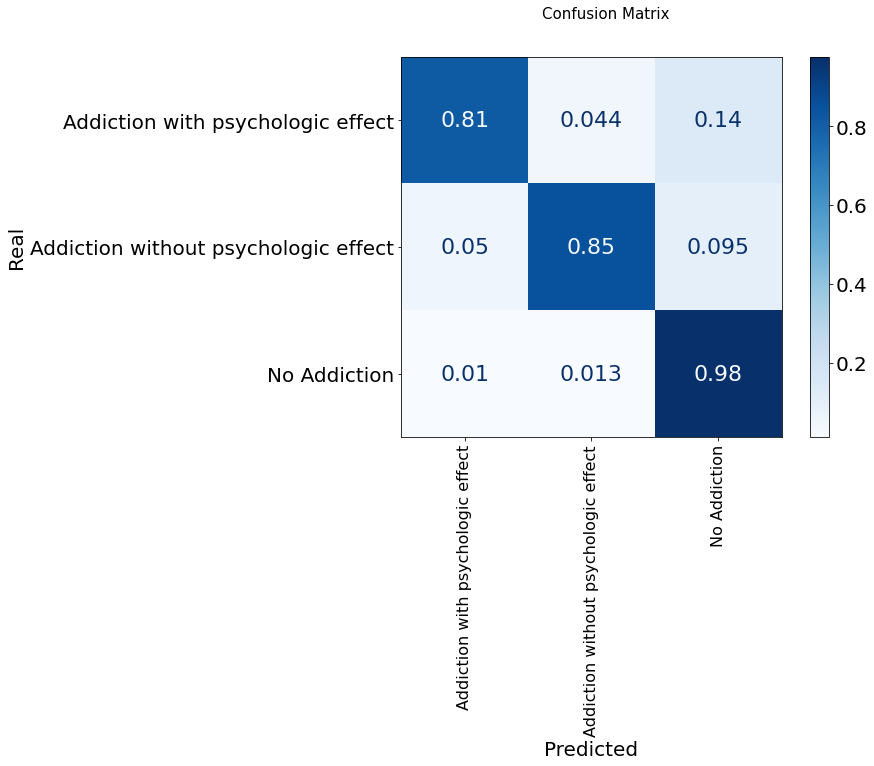

In [15]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(k_nn_grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.savefig('../../image/ConfusionMatrixKnn.png',bbox_inches='tight')
plt.show() 

## First Conclusion

- Great prediction for low addiction/no addicted
- worst prediction for addiction with psychologic effect, but nothing alarmant. 

In [ ]:
knn_filename = "../../model/knn.pkl"  

with open(knn_filename, 'wb') as file:  
    pickle.dump(k_nn_grid, file)